##1. Introduction de la matrice des distances

In [34]:
distances = [[0,12,13,15,23,25,56,27,38,29,60,32],
             [12,0,23,22,34,56,24,78,79,34,23,24],
             [13,23,0,25,23,19,18,42,25,23,26,33],
             [15,22,25,0,12,24,38,27,38,49,69,29],
             [23,34,23,12,0,54,36,71,81,19,100,22],
             [25,56,19,24,54,0,16,27,26,37,105,72],
             [56,24,18,38,36,16,0,18,23,24,25,26],
             [27,78,42,27,71,27,18,0,18,19,30,53],
             [38,79,25,38,81,26,23,18,0,29,23,22],
             [29,34,23,49,19,37,24,19,29,0,22,42],
             [60,23,26,69,100,105,25,30,23,22,0,36],
             [32,24,33,29,22,72,26,53,22,42,36,0]]

distances

[[0, 12, 13, 15, 23, 25, 56, 27, 38, 29, 60, 32],
 [12, 0, 23, 22, 34, 56, 24, 78, 79, 34, 23, 24],
 [13, 23, 0, 25, 23, 19, 18, 42, 25, 23, 26, 33],
 [15, 22, 25, 0, 12, 24, 38, 27, 38, 49, 69, 29],
 [23, 34, 23, 12, 0, 54, 36, 71, 81, 19, 100, 22],
 [25, 56, 19, 24, 54, 0, 16, 27, 26, 37, 105, 72],
 [56, 24, 18, 38, 36, 16, 0, 18, 23, 24, 25, 26],
 [27, 78, 42, 27, 71, 27, 18, 0, 18, 19, 30, 53],
 [38, 79, 25, 38, 81, 26, 23, 18, 0, 29, 23, 22],
 [29, 34, 23, 49, 19, 37, 24, 19, 29, 0, 22, 42],
 [60, 23, 26, 69, 100, 105, 25, 30, 23, 22, 0, 36],
 [32, 24, 33, 29, 22, 72, 26, 53, 22, 42, 36, 0]]

##2. Fonction de calcul de la distance pour un chemin donné

In [35]:
def count_dist(chemin):
    dist = 0
    for i in range(len(chemin)-1):
        dist += distances[chemin[i]][chemin[i+1]]
    return dist

##3. Solution initiale

In [43]:
def init_sol(distances, departure_ville):

  # Algorithme du " nearest neighbour " pour l'initialisation de la solution S0
  solution = [departure_ville]
  current_ville = departure_ville
  while len(solution) < len(distances):
    min_distance = np.inf
    next_ville = None
    for ville, distance in enumerate(distances[current_ville]):
      if distance < min_distance and ville not in solution:
        min_distance = distance
        next_ville = ville
    solution.append(next_ville)
    current_ville = next_ville
  solution.append(departure_ville)
  return solution


##4. Fonction de permutation entre deux indices donnés

In [37]:
def swap_func(solution, i, j):
  swaped_solution = solution.copy()
  swaped_solution[i] , swaped_solution[j] = solution[j] , solution[i]
  return swaped_solution


##5. Fonction de génération des voisins à partir d'une solution donnée en entrée

In [38]:
def neighboring(solution):
  neighbors_list = []
  
  # Génération des vosins avec permutations sauf pour la ville de départ et d'arrivée
  for i in range(1, len(solution)-1):
    for j in range(i+1, len(solution)-1):
      neighbor = solution[:]

      # Permutation des éléments d'indices i et j
      neighbor = swap_func(neighbor, i,j)

      # Ajout du voisin à la liste
      neighbors_list.append(neighbor)
    
  return neighbors_list

##6. Algorithme de la recherche tabou

In [39]:
def tabu_search(departure_ville, distances): 

  # La liste qui contient les solutions tabou / les chemins tabou
  tabu_list = [] 

  # Choix de la solution initiale / chemin initial
  s0 = init_sol(distances,departure_ville)

  # Le chemin actuelle
  s = s0.copy()

  # La distance actuelle
  best_distance = count_dist(s) 
  best_solution = s.copy()
  Tabu_length = 50
  distances_globales = []
  best_distances_globales = []
  distance_locale = best_distance


  print("La distance de départ : ", best_distance)
  print("Le chemin de départ : ", s0)
  

  print("-----------------------------------------------")

  # Nombre d'itérations
  nb_it = 100

  #Compteur d'itérations
  cpt = 0

  while cpt < nb_it:
    # Utilisés principalement pour l'affichage de l'évolution de la solution
    distance_locale = count_dist(s)
    distances_globales.append(distance_locale)

    # Générer la liste des voisins
    neighbors = neighboring(s)

    # Ces variables permettent de choisir le meilleur voisin pour chaque solution
    best_solution_neighbor = None
    best_distance_neighbor = float('inf')

    
    # Parcourir la liste des voisins
    for n in neighbors : 

      # Verifier si la solution voisine n'est pas une solution tabou
      if n not in tabu_list : 
        n_distance = count_dist(n)
        if n_distance < best_distance_neighbor : 
          best_solution_neighbor = n.copy()
          best_distance_neighbor = n_distance


    # Initialisation de la liste tabou et MÀJ de la solution optimale
    if best_solution_neighbor is not None : 

      #MÀJ de la soulution courante
      s = best_solution_neighbor.copy()

      # MÀJ du chemin optimal et la distance optimale
      if best_distance_neighbor < best_distance : 
        best_solution = s.copy()
        best_distance = best_distance_neighbor
        best_distances_globales.append(best_distance)

      #MÀJ de la liste tabou en insérant la nouvelle solution optimale tout en dépilant la toute première solution empilée qui se trouve dans le dernier indice de la table
      tabu_list = [best_solution_neighbor] + tabu_list[:Tabu_length]

    cpt += 1
  print("La distance optimale est : ", best_distance)
  print("Le chemin optimal est : ", best_solution)
  return distances_globales, best_distances_globales


    
      
    

##7. Appel de la focntion : 
avec comme paramètres d'entrée : 
**la ville de départ et la matrice de distances entre les villes**

In [44]:
distances_globales, best_distances_globales= tabu_search(departure_ville = 0, distances = distances)

La distance de départ :  280
Le chemin de départ :  [0, 1, 3, 4, 9, 7, 6, 5, 2, 8, 11, 10, 0]
-----------------------------------------------
La distance optimale est :  220
Le chemin optimal est :  [0, 1, 3, 4, 11, 8, 10, 9, 7, 6, 5, 2, 0]


Text(0.5, 1.0, 'Évolution des distances selon les itérations')

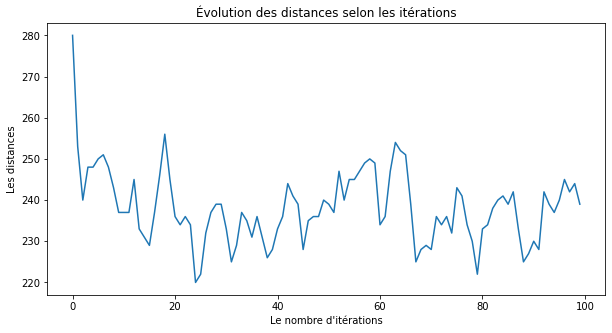

In [41]:
plot.figure(figsize=(10, 5))
plot.plot(distances_globales)
plot.xlabel("Le nombre d'itérations")
plot.ylabel("Les distances")
plot.title('Évolution des distances selon les itérations')

Text(0, 0.5, 'Les valeurs de best_distance')

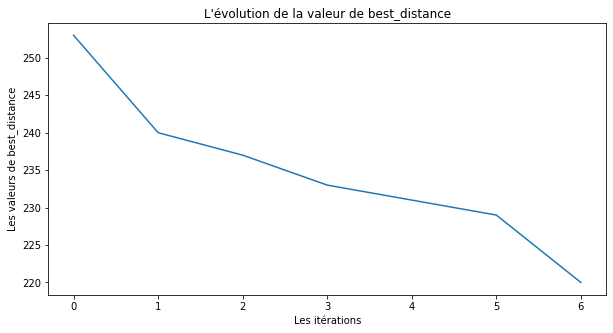

In [42]:
plot.figure(figsize=(10, 5))
plot.plot(best_distances_globales)
plot.title("L'évolution de la valeur de best_distance")
plot.xlabel("Les itérations")
plot.ylabel("Les valeurs de best_distance")